 Часть 1: «Следствие ведёт детектив»

1.1 — Загрузка датасета

In [10]:
import pandas as pd

merged_df = pd.read_csv("merged_tmdb_dataset.csv")
merged_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,vote_count,movie_id,title_y,cast,crew,runtime_api,vote_average_api,popularity_api,budget_api,revenue_api
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",162.0,7.588,30.9680,237000000.0,2.923706e+09
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",169.0,7.258,18.4847,300000000.0,9.616912e+08
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",148.0,6.557,15.8449,245000000.0,8.807076e+08
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",165.0,7.784,20.8229,250000000.0,1.081041e+09
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",132.0,6.330,9.4945,250000000.0,2.841000e+08


1.2 — Анализ пропущенных значений

In [11]:
missing_info = merged_df.isnull().sum()
missing_percent = (missing_info / len(merged_df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_info,
    'Percentage': missing_percent
})

missing_df[missing_df['Missing Values'] > 0].sort_values(by="Percentage", ascending=False)

,Missing Values,Percentage
budget_api,4703,97.917968
runtime_api,4703,97.917968
revenue_api,4703,97.917968
vote_average_api,4703,97.917968
popularity_api,4703,97.917968
homepage,3091,64.355611
tagline,844,17.572351
overview,3,0.062461
runtime,2,0.041641
release_date,1,0.020820


1.3 — Определение закономерностей пропусков

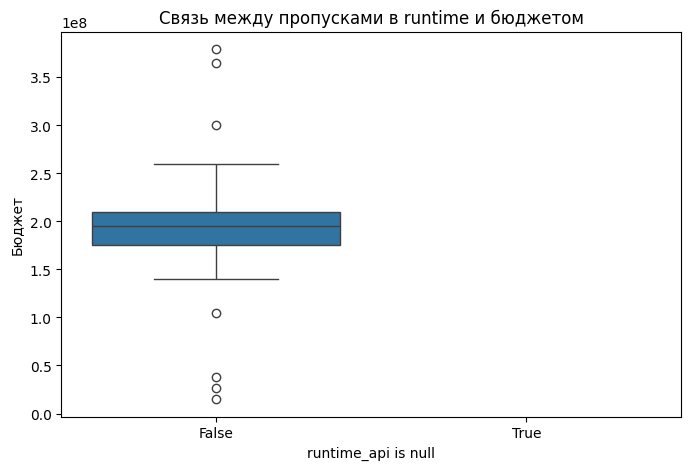

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x=merged_df['runtime_api'].isnull(), y=merged_df['budget_api'])
plt.title("Связь между пропусками в runtime и бюджетом")
plt.xlabel("runtime_api is null")
plt.ylabel("Бюджет")
plt.show()

 1.4 — Гипотеза о причинах пропусков

Гипотеза:

Пропуски в runtime_api, budget_api, revenue_api и других полях из TMDB API возникают, потому что:

Не все фильмы имеют эти данные в открытом доступе (например, малобюджетные или не вышедшие в прокат).
API-ответ может возвращать null, если информация недоступна или неполная.
Также можно предположить, что более старые или менее популярные фильмы чаще имеют пропуски.

1.5 — Анализ выбросов

In [3]:
import numpy as np

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < lower) | (data[column] > upper)]

outliers_budget = detect_outliers_iqr(merged_df, 'budget_api')
outliers_runtime = detect_outliers_iqr(merged_df, 'runtime_api')

print("Выбросы по бюджету:", len(outliers_budget))
print("Выбросы по runtime:", len(outliers_runtime))


Выбросы по бюджету: 7
Выбросы по runtime: 0


Часть 2: «Выбор подходящего оружия»

2.1 — Работа с пропусками: удаление

In [4]:
df_dropna = merged_df.dropna(subset=['runtime_api', 'budget_api'])
print("Размер после удаления пропусков:", df_dropna.shape)

Размер после удаления пропусков: (100, 29)


 2.2 — Заполнение пропусков: среднее / медиана

In [5]:
df_fill = merged_df.copy()
df_fill['runtime_api'] = df_fill['runtime_api'].fillna(df_fill['runtime_api'].median())
df_fill['budget_api'] = df_fill['budget_api'].fillna(df_fill['budget_api'].median())

df_fill[['runtime_api', 'budget_api']].isnull().sum()

,0
runtime_api,0
budget_api,0


2.3 — Обработка выбросов: обрезка

In [6]:
def clip_outliers(df, column):
    lower = df[column].quantile(0.01)
    upper = df[column].quantile(0.99)
    df[column] = df[column].clip(lower, upper)
    return df

df_clipped = df_fill.copy()
df_clipped = clip_outliers(df_clipped, 'budget_api')
df_clipped = clip_outliers(df_clipped, 'runtime_api')


2.4 — Приведение категориальных признаков к числам

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_clipped.copy()
le = LabelEncoder()
df_encoded['original_language_encoded'] = le.fit_transform(df_encoded['original_language'].astype(str))

df_encoded[['original_language', 'original_language_encoded']].head()

2.5 — Влияние на статистику: сравним средние значения

In [8]:
print("Среднее runtime ДО обработки:", merged_df['runtime_api'].mean())
print("Среднее runtime ПОСЛЕ обработки:", df_encoded['runtime_api'].mean())

print("Средний бюджет ДО обработки:", merged_df['budget_api'].mean())
print("Средний бюджет ПОСЛЕ обработки:", df_encoded['budget_api'].mean())

Среднее runtime ДО обработки: 127.36
Среднее runtime ПОСЛЕ обработки: 126.5
Средний бюджет ДО обработки: 194050000.0
Средний бюджет ПОСЛЕ обработки: 194999999.99999997


Часть 3: «Раскрытие дела»

3.1 — Выбор лучшего метода

Наиболее эффективный подход:
Заполнение медианой + обрезка выбросов.

Удаление сильно сокращает датасет (теряется информация).
Среднее чувствительно к выбросам.
Медиана и обрезка дают сбалансированные, устойчивые значения.
Также категоричные признаки удобно кодировать через LabelEncoder или OneHotEncoder.


3.2 — Рекомендации по работе с пропусками

Рекомендация:

Если данные числовые и немного пропусков — следует использовать медиану.
Если пропусков много и они не случайны — необходимо проанализировать, стоит ли использовать заполнение или удалить.


Комбинированный подход

In [9]:
def custom_fill(df):
    df = df.copy()
    for col in df.select_dtypes(include='number'):
        df[col] = df[col].fillna(df[col].median())
    for col in df.select_dtypes(include='object'):
        df[col] = df[col].fillna(df[col].mode()[0])
    return df

df_custom = custom_fill(merged_df)

for col in ['budget_api', 'runtime_api']:
    df_custom = clip_outliers(df_custom, col)

df_custom.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,vote_count,movie_id,title_y,cast,crew,runtime_api,vote_average_api,popularity_api,budget_api,revenue_api
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",127.0,7.588,30.9680,1.999000e+08,2.923706e+09
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",127.0,7.258,18.4847,1.999000e+08,9.616912e+08
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",127.0,6.557,15.8449,1.999000e+08,8.807076e+08
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",127.0,7.784,20.8229,1.999000e+08,1.081041e+09
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",127.0,6.330,9.4945,1.999000e+08,2.841000e+08
